# Generate figure of taxonomy

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from momepy.datasets import get_path
import geopandas as gpd
import mapclassify
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D

from scipy.cluster.hierarchy import dendrogram, fcluster, set_link_color_palette

In [ ]:
def morphotopes_to_etcs(region_id, etcs=True, model_params="_100_0_None_None_False"):
    if etcs:
        etcs = gpd.read_parquet(
            f"/data/uscuni-ulce/processed_data/tessellations/tessellation_{region_id}.parquet"
        )

    else:
        etcs = gpd.read_parquet(
            f"/data/uscuni-ulce/processed_data/buildings/buildings_{region_id}.parquet"
        )

    etcs["label"] = -1

    morphotopes = pd.read_parquet(
        f"/data/uscuni-ulce/processed_data/morphotopes/tessellation_labels_morphotopes_{region_id}{model_params}.pq"
    )
    morphotopes.loc[:, "morphotope_label"] = morphotopes.values[:, 0]

    morph_dict = pd.Series(
        np.arange(np.unique(morphotopes.values).shape[0]), np.unique(morphotopes.values)
    )
    etcs.loc[morphotopes.index, "label"] = morphotopes.map(
        lambda x: morph_dict.loc[x]
    ).values
    etcs["morph"] = str(region_id) + "_" + "-1"
    etcs.loc[morphotopes.index, "morph"] = str(region_id) + "_" + morphotopes.values
    return etcs

In [ ]:
cdata = pd.read_parquet("cdata.parquet")

In [ ]:
grouped_data = pd.read_parquet("grouped_data.parquet")

Metadata

In [ ]:
v = "v10"
lower_cut = 500  # the lowest level shown in tree - matched to labels in pmtiles
higher_cut = 1000  # level at which colors are assigned
model_params = "_post_processing_v1"

Read linkage matrix.

In [ ]:
linkage_matrix = np.load(
    f"/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy"
)

Code for circular dendrogram.

In [ ]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])


def smoothline(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

In [ ]:
low = fcluster(linkage_matrix, lower_cut, criterion="distance")
high = fcluster(linkage_matrix, higher_cut, criterion="distance")

In [ ]:
colors = [
    "#4069BC",
    "#7CBAE4",
    "#E69C63",
    "#eec1d5",
    "#E0665F",
    "#ECBF43",
    "#b2cd32",
    "#1F943E",
]
set_link_color_palette(colors)


In [ ]:
nns = pd.read_parquet("nns.parquet")

In [ ]:
names = [
    "Incoherent Large-Scale Homogenous Fabric",
    "Incoherent Large-Scale Heterogenous Fabric",
    "Incoherent Small-Scale Linear Fabric",
    "Incoherent Small-Scale Sparse Fabric",
    "Incoherent Small-Scale Compact Fabric",
    "Coherent Interconnected Fabric",
    "Coherent Dense Disjoint Fabric",
    "Coherent Dense Adjacent Fabric",
]

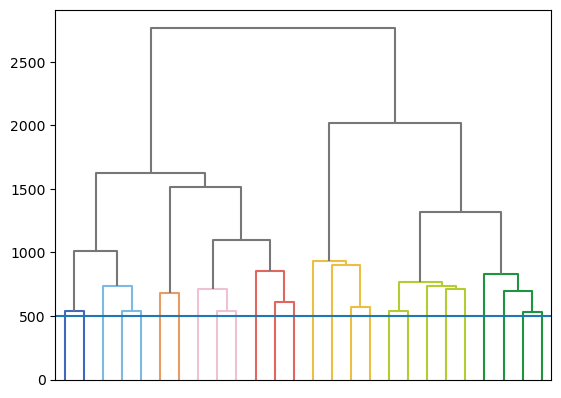

In [ ]:
d = dendrogram(
    linkage_matrix,
    no_plot=False,
    truncate_mode="lastp",
    p=26,
    color_threshold=higher_cut,
    no_labels=True,
    above_threshold_color="#777",
)
plt.axhline(500)

In [ ]:
icoord = np.array(d["icoord"])
dcoord = np.array(d["dcoord"])
gap = 0.043

dcoord = -dcoord
# avoid a wedge over the radial labels
imax = icoord.max()
imin = icoord.min()
icoord = ((icoord - imin) / (imax - imin) * (1 - gap) + gap / 2) * 2 * np.pi

In [ ]:
inner = "1"
outer = "2"

In [ ]:
morph_regions = nns[f"nn_{inner}"].str.split("_").str[0].values
nn_etcs = []
for region in np.unique(morph_regions):
    region_etcs = morphotopes_to_etcs(region, etcs=False, model_params=model_params)
    region_etcs = region_etcs[region_etcs.morph.isin(nns[f"nn_{inner}"])]
    nn_etcs.append(region_etcs)

nn_etcs_inner = pd.concat(nn_etcs)

In [ ]:
morph_regions = nns[f"nn_{outer}"].str.split("_").str[0].values
nn_etcs = []
for region in np.unique(morph_regions):
    region_etcs = morphotopes_to_etcs(region, etcs=False, model_params=model_params)
    region_etcs = region_etcs[region_etcs.morph.isin(nns[f"nn_{outer}"])]
    nn_etcs.append(region_etcs)

nn_etcs_outer = pd.concat(nn_etcs)

In [ ]:
blg = gpd.read_file(get_path("bubenec"), layer="buildings")

In [ ]:
abundacne = np.array(
    [
        2060,
        18992,
        685,
        5328,
        5347,
        6052,
        21252,
        10336,
        26454,
        28294,
        4,
        22834,
        69598,
        3,
        535,
        1833,
        7636,
        29677,
        43803,
        67101,
        7607,
        100055,
        56,
        15962,
        10424,
        17331,
    ]
)

- [ ] legend for branches
- [ ] legend for circles

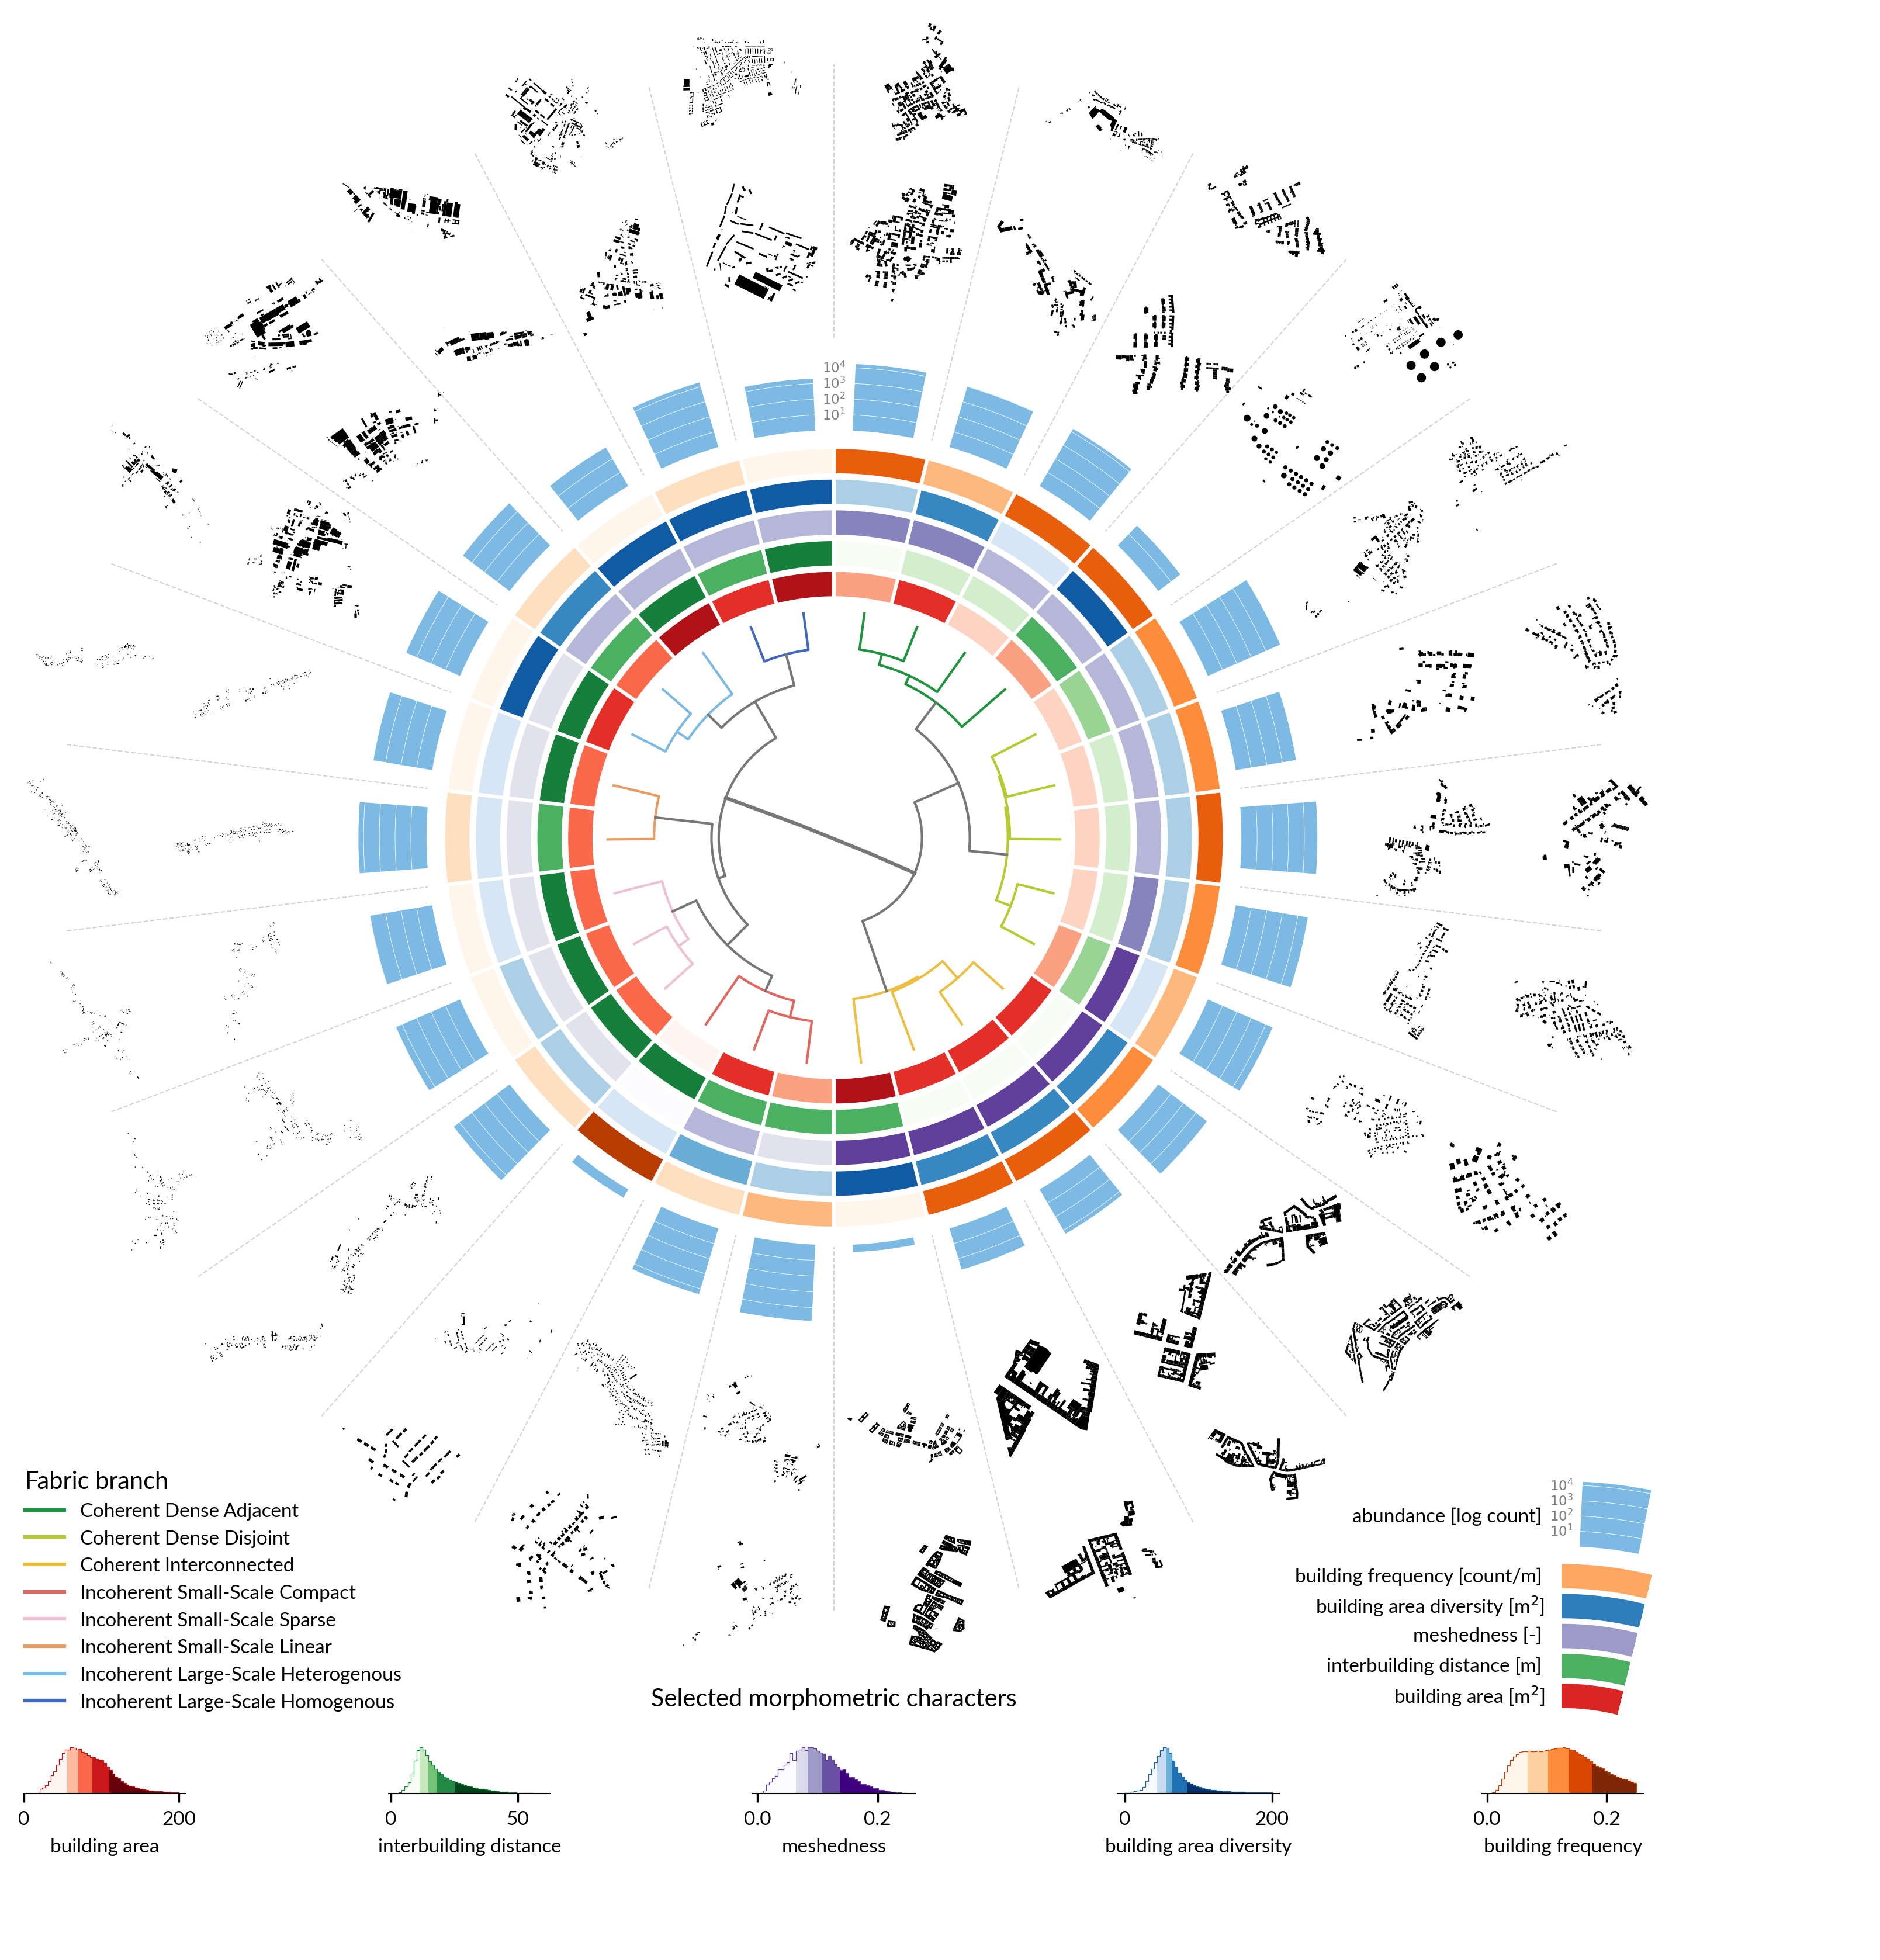

In [ ]:
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Lato"]


fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_subplot(111, polar=True)
# fix the extent
ax.plot(
    [0, 0],
    [
        0,
        8000,
    ],
    color="none",
    linewidth=0.5,
    linestyle="--",
)
ax.plot(
    [np.pi / 2, np.pi / 2],
    [
        0,
        8000,
    ],
    color="none",
    linewidth=0.5,
    linestyle="--",
)
ax.plot(
    [np.pi * 1.5, np.pi * 1.5],
    [
        0,
        8000,
    ],
    color="none",
    linewidth=0.5,
    linestyle="--",
)
ax.plot(
    [np.pi, np.pi],
    [
        0,
        8000,
    ],
    color="none",
    linewidth=0.5,
    linestyle="--",
)

for xs, ys, color in zip(icoord[:-1], dcoord[:-1], d["color_list"][:-1]):
    xs = smoothsegment(xs)
    ys = smoothsegment(ys)
    ax.plot(xs, ys, color=color, linewidth=1)


ax.plot(icoord[-1], dcoord[-1], color=d["color_list"][-1])

ax.spines["polar"].set_visible(False)
ax.set_rlabel_position(0)
Nxticks = 10
xticks = np.linspace(gap / 2, 1 - gap / 2, Nxticks)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])

ax.grid(False, axis="x")
ax.set_theta_zero_location("N")

line_len = np.pi * 2 / 26

# morphometric values
sdbare_legend = mapclassify.classify(
    grouped_data.sdbAre[grouped_data.sdbAre < 200], "quantiles", k=5
)
sdbare = mapclassify.UserDefined(cdata.sdbAre, bins=sdbare_legend.bins)
ltbibd_legend = mapclassify.classify(
    grouped_data.ltbIBD[grouped_data.ltbIBD < 60], "quantiles", k=5
)
ltbibd = mapclassify.UserDefined(cdata.ltbIBD, bins=ltbibd_legend.bins)
lcdmes_legend = mapclassify.classify(
    grouped_data.lcdMes[(grouped_data.lcdMes > 0) & (grouped_data.lcdMes < 0.25)],
    "quantiles",
    k=5,
)
lcdmes = mapclassify.UserDefined(cdata.lcdMes, bins=lcdmes_legend.bins)
micbad_legend = mapclassify.classify(
    grouped_data.micBAD[grouped_data.micBAD < 200], "quantiles", k=5
)
micbad = mapclassify.UserDefined(cdata.micBAD, bins=micbad_legend.bins)
sisbpm_legend = mapclassify.classify(
    grouped_data.sisBpM[grouped_data.sisBpM < 0.25], "quantiles", k=5
)
sisbpm = mapclassify.UserDefined(cdata.sisBpM, bins=sisbpm_legend.bins)

linewidth = 10
start_y = 400
offset = linewidth * 45
start = 0
for i in range(26):
    ax.plot(
        np.linspace(start, start + line_len, 100),
        [start_y] * 100,
        color=cm.Reds((sdbare.yb / sdbare.k)[i]),
        linewidth=linewidth,
        alpha=1,
        solid_capstyle="butt",
    )
    ax.plot(
        np.linspace(start, start + line_len, 100),
        [start_y + offset] * 100,
        color=cm.Greens((ltbibd.yb / ltbibd.k)[i]),
        linewidth=linewidth,
        alpha=1,
        solid_capstyle="butt",
    )
    ax.plot(
        np.linspace(start, start + line_len, 100),
        [start_y + offset * 2] * 100,
        color=cm.Purples((lcdmes.yb / lcdmes.k)[i]),
        linewidth=linewidth,
        alpha=1,
        solid_capstyle="butt",
    )
    ax.plot(
        np.linspace(start, start + line_len, 100),
        [start_y + offset * 3] * 100,
        color=cm.Blues((micbad.yb / micbad.k)[i]),
        linewidth=linewidth,
        alpha=1,
        solid_capstyle="butt",
    )
    ax.plot(
        np.linspace(start, start + line_len, 100),
        [start_y + offset * 4] * 100,
        color=cm.Oranges((sisbpm.yb / sisbpm.k)[i]),
        linewidth=linewidth,
        alpha=1,
        solid_capstyle="butt",
    )
    start += line_len

sdbare_ax = ax.inset_axes((0, -0.09, 0.1, 0.03))
sdbare_legend.plot_legendgram(ax=sdbare_ax, cmap="Reds", inset=False, frameon=True)
sdbare_ax.hist(
    sdbare_legend.y, bins=50, color=cm.Reds(0.8), histtype="step", linewidth=0.3
)
sdbare_ax.tick_params(axis="x", which="both", labelsize=8)
sdbare_ax.set_xlabel("building area", fontsize=8)
sdbare_ax.set_xlim(0, sdbare_ax.get_xlim()[1])
sdbare_ax.spines["top"].set_visible(False)
sdbare_ax.spines["right"].set_visible(False)
sdbare_ax.spines["left"].set_visible(False)
sdbare_ax.spines["bottom"].set_linewidth(0.5)


ltbibd_ax = ax.inset_axes((0.225, -0.09, 0.1, 0.03))
ltbibd_legend.plot_legendgram(ax=ltbibd_ax, cmap="Greens", inset=False, frameon=True)
ltbibd_ax.hist(
    ltbibd_legend.y, bins=50, color=cm.Greens(0.8), histtype="step", linewidth=0.3
)
ltbibd_ax.tick_params(axis="x", which="both", labelsize=8)
ltbibd_ax.set_xlabel("interbuilding distance", fontsize=8)
ltbibd_ax.spines["top"].set_visible(False)
ltbibd_ax.spines["right"].set_visible(False)
ltbibd_ax.spines["left"].set_visible(False)
ltbibd_ax.spines["bottom"].set_linewidth(0.5)

lcdmes_ax = ax.inset_axes((0.45, -0.09, 0.1, 0.03))
lcdmes_legend.plot_legendgram(ax=lcdmes_ax, cmap="Purples", inset=False, frameon=True)
lcdmes_ax.hist(
    lcdmes_legend.y, bins=50, color=cm.Purples(0.8), histtype="step", linewidth=0.3
)
lcdmes_ax.tick_params(axis="x", which="both", labelsize=8)
lcdmes_ax.set_xlabel("meshedness", fontsize=8)
lcdmes_ax.spines["top"].set_visible(False)
lcdmes_ax.spines["right"].set_visible(False)
lcdmes_ax.spines["left"].set_visible(False)
lcdmes_ax.spines["bottom"].set_linewidth(0.5)

micbad_ax = ax.inset_axes((0.675, -0.09, 0.1, 0.03))
micbad_legend.plot_legendgram(ax=micbad_ax, cmap="Blues", inset=False, frameon=True)
micbad_ax.hist(
    micbad_legend.y, bins=50, color=cm.Blues(0.8), histtype="step", linewidth=0.3
)
micbad_ax.tick_params(axis="x", which="both", labelsize=8)
micbad_ax.set_xlabel("building area diversity", fontsize=8)
micbad_ax.spines["top"].set_visible(False)
micbad_ax.spines["right"].set_visible(False)
micbad_ax.spines["left"].set_visible(False)
micbad_ax.spines["bottom"].set_linewidth(0.5)

sisbpm_ax = ax.inset_axes((0.9, -0.09, 0.1, 0.03))
sisbpm_legend.plot_legendgram(ax=sisbpm_ax, cmap="Oranges", inset=False, frameon=True)
sisbpm_ax.hist(
    sisbpm_legend.y, bins=50, color=cm.Oranges(0.8), histtype="step", linewidth=0.3
)
sisbpm_ax.tick_params(axis="x", which="both", labelsize=8)
sisbpm_ax.set_xlabel("building frequency", fontsize=8)
sisbpm_ax.spines["top"].set_visible(False)
sisbpm_ax.spines["right"].set_visible(False)
sisbpm_ax.spines["left"].set_visible(False)
sisbpm_ax.spines["bottom"].set_linewidth(0.5)

# Add log scale bar plot with visual indication
bars = ax.bar(
    np.linspace(line_len / 2, np.pi * 2 - line_len / 2, 26),
    np.log(abundacne) * 100,
    bottom=start_y + offset * 5,
    width=0.15,
    color=colors[1],
)

# Add log scale indicators - subtle tick marks on the right side
log_base_y = start_y + offset * 5
log_values = [10, 100, 1000, 10000]  # Representative abundance values
log_labels = [
    "$10^{1}$",
    "$10^{2}$",
    "$10^{3}$",
    "$10^{4}$",
]
for lab, val in zip(log_labels, log_values):
    log_y = log_base_y + np.log(val) * 100
    # Add small tick marks at 0 radians (top of circle)
    ax.plot(np.linspace(0, 2 * np.pi, 256), [log_y] * 256, color="white", linewidth=0.2)
    # Add very small text labels for the log scale
    ax.text(0, log_y, lab, fontsize=5.5, color="gray", ha="center", va="center")

inset_size = 0.08
# morphotopes
# # Create 26 inset axes arranged in a circle
for i in range(26):
    angle = (i * 2 * np.pi / 26) + (np.pi / 26)
    # Calculate position for each inset axis around the circle
    x_pos = 0.5 + 0.37 * np.cos(angle + np.pi / 2)  # -np.pi/2 to start at top
    y_pos = 0.5 + 0.37 * np.sin(angle + np.pi / 2)

    inset = ax.inset_axes(
        [x_pos - inset_size / 2, y_pos - inset_size / 2, inset_size, inset_size]
    )
    morph = nns[f"nn_{inner}"].iloc[i]
    morph_buildings = nn_etcs_inner[nn_etcs_inner.morph == morph]
    morph_buildings.plot(ax=inset, color="k")
    inset.set_axis_off()

    # Calculate position for each inset axis around the circle
    x_pos = 0.5 + 0.47 * np.cos(angle + np.pi / 2)  # -np.pi/2 to start at top
    y_pos = 0.5 + 0.47 * np.sin(angle + np.pi / 2)

    inset = ax.inset_axes(
        [x_pos - inset_size / 2, y_pos - inset_size / 2, inset_size, inset_size]
    )
    morph = nns[f"nn_{outer}"].iloc[i]
    morph_buildings = nn_etcs_outer[nn_etcs_outer.morph == morph]
    morph_buildings.plot(ax=inset, color="k")
    inset.set_axis_off()


for x in np.linspace(0, 2 * np.pi, 27)[:-1]:
    if x == 0:
        ax.plot(
            [x, x],
            [
                4000,
                8000,
            ],
            color="lightgray",
            linewidth=0.5,
            linestyle="--",
        )
        ax.plot(
            [x, x],
            [
                0,
                start_y + offset * 5,
            ],
            color="white",
        )
    else:
        ax.plot(
            [x, x],
            [
                0,
                8000,
            ],
            color="lightgray",
            linewidth=0.5,
            linestyle="--",
        )
        ax.plot(
            [x, x],
            [
                0,
                start_y + offset * 5,
            ],
            color="white",
        )


patches = []
for color in colors:
    patches.append(Line2D([0, 1], [0, 0], color=color))
ax.legend(
    handles=patches,
    labels=[n[:-7] for n in names],
    frameon=False,
    fontsize=8,
    reverse=True,
    markerfirst=True,
    loc="lower left",
    bbox_to_anchor=(-0.01, -0.05),
    title="Fabric branch",
    alignment="left",
)


# lax = ax.inset_axes((-.13, -.182, .3, .3), polar=True)
lax = ax.inset_axes((0.835, -0.182, 0.3, 0.3), polar=True)

# Use polar-specific methods instead of xlim/ylim
lax.set_ylim(ax.get_ylim()[0], 4000)
lax.set_xlim(0, 2 * np.pi)

# Set theta range to match the original
# lax.set_thetalim(0, np.pi / 13)
lax.set_thetalim(2 * np.pi - np.pi / 13, 2 * np.pi)

lax.spines["polar"].set_visible(False)
lax.set_rlabel_position(0)
lax.set_xticks([])
lax.set_yticks([])
lax.set_xticklabels([])

lax.grid(False, axis="x")
lax.set_axis_off()
lax.set_theta_zero_location("N")

line_len = np.pi * 2 / 26

linewidth = 10
start_y = 400
offset = linewidth * 45
start = 2 * np.pi - np.pi / 13
lax.plot(
    np.linspace(start, start + line_len, 100),
    [start_y] * 100,
    color=cm.Reds(0.7),
    linewidth=linewidth,
    alpha=1,
    solid_capstyle="butt",
)
lax.plot(
    np.linspace(start, start + line_len, 100),
    [start_y + offset] * 100,
    color=cm.Greens(0.6),
    linewidth=linewidth,
    alpha=1,
    solid_capstyle="butt",
)
lax.plot(
    np.linspace(start, start + line_len, 100),
    [start_y + offset * 2] * 100,
    color=cm.Purples(0.5),
    linewidth=linewidth,
    alpha=1,
    solid_capstyle="butt",
)
lax.plot(
    np.linspace(start, start + line_len, 100),
    [start_y + offset * 3] * 100,
    color=cm.Blues(0.7),
    linewidth=linewidth,
    alpha=1,
    solid_capstyle="butt",
)
lax.plot(
    np.linspace(start, start + line_len, 100),
    [start_y + offset * 4] * 100,
    color=cm.Oranges(0.4),
    linewidth=linewidth,
    alpha=1,
    solid_capstyle="butt",
)

bars = lax.bar(
    [start + (line_len / 2)],
    np.log(abundacne)[-1] * 100,
    bottom=start_y + offset * 5,
    width=0.15,
    color=colors[1],
)

# Add log scale indicators
log_base_y = start_y + offset * 5
log_values = [10, 100, 1000, 10000]
log_labels = ["$10^{1}$", "$10^{2}$", "$10^{3}$", "$10^{4}$"]
for lab, val in zip(log_labels, log_values):
    log_y = log_base_y + np.log(val) * 100
    lax.plot(
        np.linspace(0, 2 * np.pi, 256), [log_y] * 256, color="white", linewidth=0.2
    )
    lax.text(0, log_y, lab, fontsize=5.5, color="gray", ha="center", va="center")

labels = [
    "building area [m$^2$]    ",
    "interbuilding distance [m]    ",
    "meshedness [-]    ",
    "building area diversity [m$^2$]    ",
    "building frequency [count/m]    ",
    "abundance [log count]    ",
]

lax.text(
    0,
    start_y,
    labels[0],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)
lax.text(
    0,
    start_y + offset,
    labels[1],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)
lax.text(
    0,
    start_y + offset * 2,
    labels[2],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)
lax.text(
    0,
    start_y + offset * 3,
    labels[3],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)
lax.text(
    0,
    start_y + offset * 4,
    labels[4],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)
lax.text(
    0,
    start_y + offset * 6,
    labels[5],
    verticalalignment="center",
    size=8,
    horizontalalignment="right",
)

text_ax = ax.inset_axes((0.45, -0.036, 0.1, 0.03))
text_ax.text(0.5, 0, "Selected morphometric characters", horizontalalignment="center")
text_ax.set_axis_off()

x0, x1 = 1.2, 11.1
y0, y1 = 0, 10.8

bbox = Bbox([[x0, y0], [x1, y1]])

plt.savefig("../data/taxonomy.png", bbox_inches=bbox)